# Titanic
https://www.kaggle.com/c/titanic

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

### Data Input

In [2]:
dataset = pd.read_csv('../input/train.csv')
testset = pd.read_csv('../input/test.csv')

In [3]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Quick EDA

In [4]:
dataset.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### EDA with visulizasions

#### Sex

   male  female
0   468      81
1   109     233


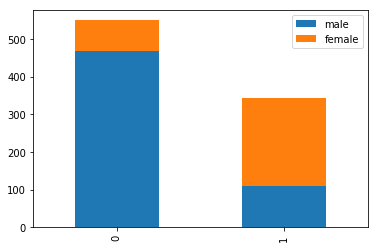

In [6]:
# print(dataset['Sex'][0:10])
m = dataset.Survived[dataset.Sex == 'male'].value_counts()
f = dataset.Survived[dataset.Sex == 'female'].value_counts()
df = pd.DataFrame({'male': m, 'female': f})

print (df)
df.plot(kind = 'bar', stacked = True)
plt.show()

#### Age

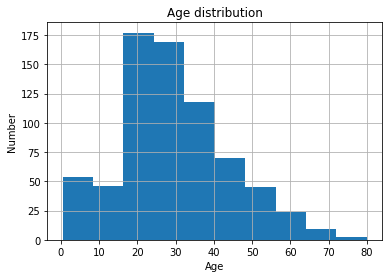

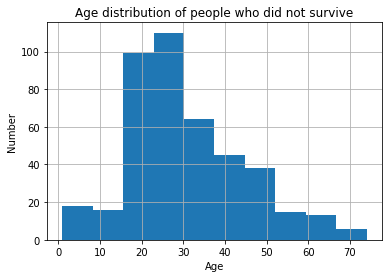

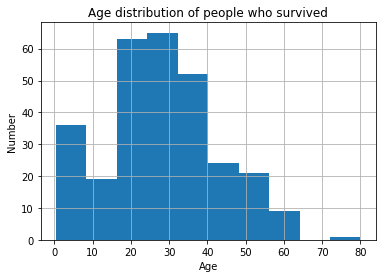

In [7]:
dataset['Age'].hist()  
plt.ylabel("Number") 
plt.xlabel("Age") 
plt.title('Age distribution')
plt.show() 

dataset[dataset.Survived==0]['Age'].hist()  
plt.ylabel("Number") 
plt.xlabel("Age") 
plt.title('Age distribution of people who did not survive')
plt.show()

dataset[dataset.Survived==1]['Age'].hist()  
plt.ylabel("Number") 
plt.xlabel("Age") 
plt.title('Age distribution of people who survived')
plt.show()

#### Prices

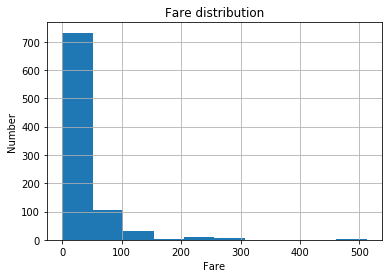

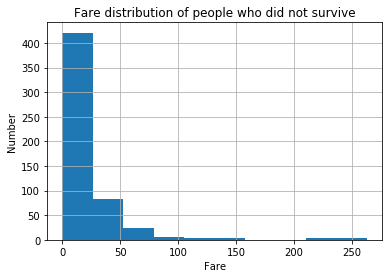

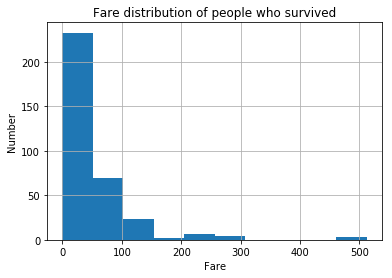

In [8]:
dataset['Fare'].hist()  
plt.ylabel("Number") 
plt.xlabel("Fare") 
plt.title('Fare distribution')
plt.show() 

dataset[dataset.Survived==0]['Fare'].hist()  
plt.ylabel("Number") 
plt.xlabel("Fare") 
plt.title('Fare distribution of people who did not survive')
plt.show()

dataset[dataset.Survived==1]['Fare'].hist()  
plt.ylabel("Number") 
plt.xlabel("Fare") 
plt.title('Fare distribution of people who survived')
plt.show()

#### P Class

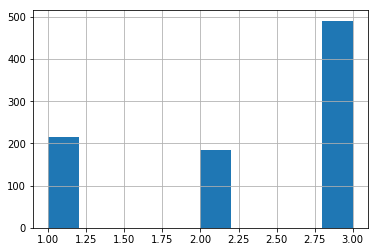

False
    p1  p2   p3
0   80  97  372
1  136  87  119


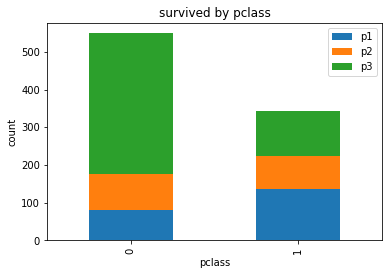

In [9]:
dataset['Pclass'].hist()  
plt.show()  
print(dataset['Pclass'].isnull().values.any())

Survived_p1 = dataset.Survived[dataset['Pclass'] == 1].value_counts()
Survived_p2 = dataset.Survived[dataset['Pclass'] == 2].value_counts()
Survived_p3 = dataset.Survived[dataset['Pclass'] == 3].value_counts()

df=pd.DataFrame({'p1':Survived_p1, 'p2':Survived_p2, 'p3':Survived_p3})
print(df)
df.plot(kind='bar', stacked=True)
plt.title("survived by pclass")
plt.xlabel("pclass") 
plt.ylabel("count")
plt.show()

#### Embarked

0    427
1    217
Name: Survived, dtype: int64


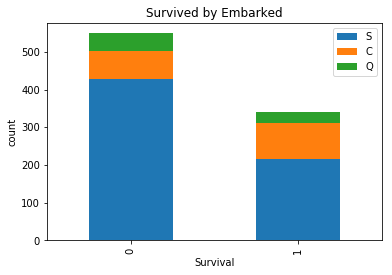

In [10]:
Survived_S = dataset.Survived[dataset['Embarked'] == 'S'].value_counts()
Survived_C = dataset.Survived[dataset['Embarked'] == 'C'].value_counts()
Survived_Q = dataset.Survived[dataset['Embarked'] == 'Q'].value_counts()

print(Survived_S)
df = pd.DataFrame({'S':Survived_S, 'C':Survived_C, 'Q':Survived_Q})
df.plot(kind='bar', stacked=True)
plt.title("Survived by Embarked")
plt.xlabel("Survival") 
plt.ylabel("count")
plt.show()

## Prepare data

In [11]:
label=dataset.loc[:,'Survived']
data=dataset.loc[:,['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']]
testdat=testset.loc[:,['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']]

print(data.shape)
print(data.head())

(891, 5)
   Pclass     Sex   Age     Fare Embarked
0       3    male  22.0   7.2500        S
1       1  female  38.0  71.2833        C
2       3  female  26.0   7.9250        S
3       1  female  35.0  53.1000        S
4       3    male  35.0   8.0500        S


### Missing Data

In [12]:
def fill_NAN(data):  
    data_copy = data.copy(deep=True)
    data_copy.loc[:,'Age'] = data_copy['Age'].fillna(data_copy['Age'].median())
    data_copy.loc[:,'Fare'] = data_copy['Fare'].fillna(data_copy['Fare'].median())
    data_copy.loc[:,'Pclass'] = data_copy['Pclass'].fillna(data_copy['Pclass'].median())
    data_copy.loc[:,'Sex'] = data_copy['Sex'].fillna('female')
    data_copy.loc[:,'Embarked'] = data_copy['Embarked'].fillna('S')
    return data_copy


data_no_nan = fill_NAN(data)
testdat_no_nan = fill_NAN(testdat)

print(testdat.isnull().values.any())    
print(testdat_no_nan.isnull().values.any())
print(data.isnull().values.any())   
print(data_no_nan.isnull().values.any())    

print(data_no_nan.head())

True
False
True
False
   Pclass     Sex   Age     Fare Embarked
0       3    male  22.0   7.2500        S
1       1  female  38.0  71.2833        C
2       3  female  26.0   7.9250        S
3       1  female  35.0  53.1000        S
4       3    male  35.0   8.0500        S


### Encoding

In [13]:
print('null in sex?', data_no_nan['Sex'].isnull().values.any())
print('null in Embarked?', data_no_nan['Embarked'].isnull().values.any())

def transfer_sex(data):
    data_copy = data.copy(deep=True)
    data_copy.loc[data_copy['Sex'] == 'female', 'Sex'] = 0
    data_copy.loc[data_copy['Sex'] == 'male', 'Sex'] = 1
    return data_copy

def transfer_embark(data):
    data_copy = data.copy(deep=True)
    data_copy.loc[data_copy['Embarked'] == 'S', 'Embarked'] = 0
    data_copy.loc[data_copy['Embarked'] == 'C', 'Embarked'] = 1
    data_copy.loc[data_copy['Embarked'] == 'Q', 'Embarked'] = 2
    return data_copy

data_after_sex = transfer_sex(data_no_nan)
testdat_after_sex = transfer_sex(testdat_no_nan)
print(testdat_after_sex.head())

data_after_embarked = transfer_embark(data_after_sex)
testdat_after_embarked = transfer_embark(testdat_after_sex)
print(testdat_after_embarked.head())

null in sex? False
null in Embarked? False
   Pclass  Sex   Age     Fare Embarked
0       3    1  34.5   7.8292        Q
1       3    0  47.0   7.0000        S
2       2    1  62.0   9.6875        Q
3       3    1  27.0   8.6625        S
4       3    0  22.0  12.2875        S
   Pclass  Sex   Age     Fare  Embarked
0       3    1  34.5   7.8292         2
1       3    0  47.0   7.0000         0
2       2    1  62.0   9.6875         2
3       3    1  27.0   8.6625         0
4       3    0  22.0  12.2875         0


## Training Model

In [14]:
# Train Test Spliting

data_now = data_after_embarked
testdat_now = testdat_after_embarked
from sklearn.model_selection import train_test_split

train_data,val_data,train_labels,val_labels=train_test_split(data_now,label,random_state=0,test_size=0.2)

print(train_data.shape, val_data.shape, train_labels.shape, val_labels.shape)

(712, 5) (179, 5) (712,) (179,)


### KNN

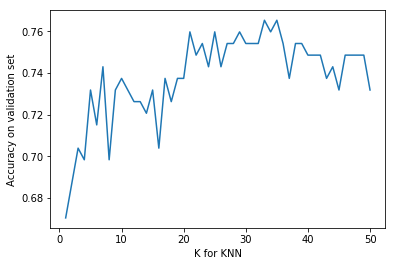

[ 0  1  3  7  2 15  5 13 17 11 12 44 14 49  8 10  4  9 42 36 16 19 18 43
  6 25 23 45 48 46 41 21 40 39 47 38 37 31 30 29 27 26 22 35 33 28 20 24
 34 32]


In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
k_range = range(1, 51)
k_scores = []
for K in k_range:
    clf=KNeighborsClassifier(n_neighbors = K)
    clf.fit(train_data,train_labels)
#     print('K=', K)
    predictions=clf.predict(val_data)
    score = accuracy_score(val_labels,predictions)
#     print(score)
    k_scores.append(score)
    
plt.plot(k_range, k_scores)
plt.xlabel('K for KNN')
plt.ylabel('Accuracy on validation set')
plt.show()
print(np.array(k_scores).argsort())

## Predicting

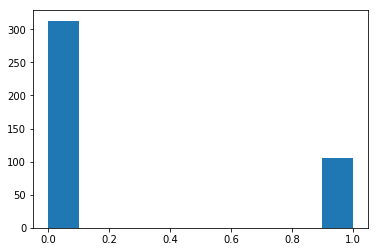

In [16]:
clf=KNeighborsClassifier(n_neighbors=33)
clf.fit(data_now,label)
result=clf.predict(testdat_now)
plt.hist(result)
plt.show()

## Writing Submissions

In [17]:
df = pd.DataFrame({"PassengerId": testset['PassengerId'],"Survived": result})
df.to_csv('submission.csv',header=True, index=False)